In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as p
from scipy import integrate

In [3]:
def generate_labels_data(data_dict):
    # Data to plot
    labels = []
    sizes = []

    for x, y in data_dict.items():
        labels.append(x)
        sizes.append(y)
    return labels, sizes


## Task 4. Real Epidemiology data
How can we calculate the number of actually sick people? 
Can you extract this information for your country from the files.

The number of actually confirmed people in Hungary on 8/4/21: 809,731
The number of actually recovered people in Hungary on 8/4/21: 749,773
The number of actually dead people in Hungary on 8/4/21: 30,032
----
The number of actually sick people in Hungary on 8/4/21: 29,926


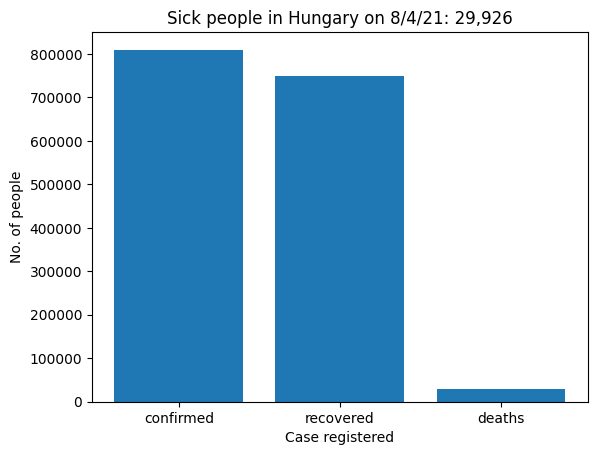

In [4]:
def last_data(url:str, selected_country:str, selected_date:str):
    df = pd.read_csv(url)
    df = df.melt(id_vars=["Province/State", "Country/Region", "Lat", "Long"], 
        var_name="Date", 
        value_name="Value")
    df.sort_values(by=['Value'])
    df2 = df[(df["Date"]==selected_date) & (df["Country/Region"] == selected_country)] 
    max = df2['Value'].groupby(df2["Date"]).sum().max()
    return max, df2


confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

selected_country = "Hungary"
selected_date = "8/4/21" # The last day when recovered cases was administrated
confirmed, confirmed_df = last_data(confirmed_url, selected_country, selected_date)
deaths, deaths_df = last_data(deaths_url, selected_country, selected_date)
recovered, recovered_df = last_data(recovered_url, selected_country, selected_date)

sick = confirmed - deaths - recovered

print("The number of actually confirmed people in " + selected_country + " on "+selected_date+":", f"{confirmed:,}")
print("The number of actually recovered people in " + selected_country + " on "+selected_date+":", f"{recovered:,}")
print("The number of actually dead people in " + selected_country + " on "+selected_date+":", f"{deaths:,}")
print("-"*4)
print("The number of actually sick people in " + selected_country + " on "+selected_date+":", f"{sick:,}")


covid_dict = {
    "confirmed": confirmed,
    "recovered": recovered,
    "deaths": deaths
}

covid_labels, covid_sizes = generate_labels_data(covid_dict)
# Plot
plt.bar(covid_labels, covid_sizes)
 
plt.xlabel("Case registered")
plt.ylabel("No. of people")
title = "Sick people in " + selected_country + " on "+selected_date+": " + f"{sick:,}"
plt.title(title)
plt.show()


## Task 5. Running cost for your experiment. 

You got a file from your usual supplier which is a text file. 
The first row is just a header with "Reagent name Price Quantity" 
From the second row there are the reagents this supplier has in store. The columns are delimitered by a TAB. The file is supplierprices.txt 

You need: 
- 100 liters of distilled water 
- 1000 liters of alcohol (96%) 
- 5 kg of rabbit litter 
- 50 g of fruit fly food 

The price of distilled water: 1000 USD
--------------------------------------------------
The item is out of stock. You can only order 340 pieces
The price of alcohol (96%): 10200 USD
--------------------------------------------------
The price of rabbit litter: 300 USD
--------------------------------------------------
The price of fruit fly food: 5000 USD
--------------------------------------------------


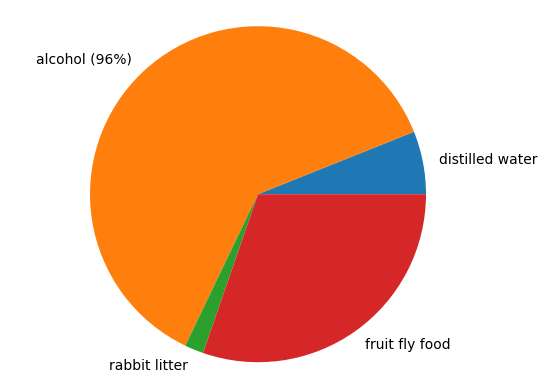

In [5]:
df = pd.read_csv("supplierprices.txt", sep='\t')


needs = {
    "distilled water":100,
    "alcohol (96%)": 1000,
    "rabbit litter": 5,
    "fruit fly food":50
    }

needs_price = 0
needs_with_price = {}
for n in needs:
    df2 = df[df["Reagent name"]==n]
    if df2["Quantity"].max() >= needs[n]:
        price = df2["Price"].min() * needs[n] 
    else:
        price = df2["Price"].min() * df2["Quantity"].max()
        print("The item is out of stock. You can only order " + str(df2["Quantity"].max()) + " pieces")
        
    print("The price of " + n +": "+ str(price) + " USD")
    needs_price += price
    print("-"*50)
    needs_with_price[n] = price


# Data to plot
label_needs, prices = generate_labels_data(needs_with_price)

# Plot
plt.pie(prices, labels=label_needs)

plt.axis('equal')
plt.show()


## Task 6. Pizza delivery data 

You have an Italian restaurant that also delivers pizza to costumers. You have a database with the hour of the order (12:08), the type of pizza ordered, the distance of the delivery and the name of the delivery guy. If more than one pizza was ordered then there is as many lines as order (so each line have only one pizza ordered). 
Pizzaorder.txt 
Orders are not in time order, but one batch is always after each other.

Tasks:
- Task 6.1 What is the busiest hour during the day? 
- Task 6.2 What is your revenue if Margherite cost 1000, Salami 1200, Funghi 1100, Quatro formaggi 1250, Calzone 1250, Frutti di Mare 1500, Hawaii 1250 ? 
- Task 6.3 How many pizzas were ordered before noon? 
- Task 6.4 Which pizza was order the most? (and how much) 
- Task 6.5 Who travelled the most that day? (do not count batches of delivery as separate trips) 
- Task 6.6 Prices go up so fast that even the owner cannot follow. Can you make it so that prices are read from another file? So by changing the price in that file you can recalculate 6.2 and also calculate hourly revenues?  
- Which hour produces the most income?

### 6.1 What is the busiest hour during the day? 

In [6]:
pizza_order_df = pd.read_csv("pizzaorder.txt", sep='\t', names=["Time", "Pizza Type", "Distance", "Delivery Guy"])
pizza_order_df["Hour"] = pizza_order_df["Time"].str[:2]


task_6_1 = pizza_order_df.groupby(["Hour"][:2]).count()
task_6_1_maximum = task_6_1.max()
task_6_1 = task_6_1[task_6_1["Pizza Type"]==task_6_1_maximum["Pizza Type"]].reset_index()
print("Task 6.1: The busiest hour during the day: " + str(task_6_1["Hour"].max()))


Task 6.1: The busiest hour during the day: 12


### 6.2 What is your revenue if Margherite cost 1000, Salami 1200, Funghi 1100, Quatro formaggi 1250, Calzone 1250, Frutti di Mare 1500, Hawaii 1250 ?

In [7]:

# create a list of our conditions
task_6_2_conditions = [
    (pizza_order_df['Pizza Type'] == "Margherita"),
    (pizza_order_df['Pizza Type'] == "Salami"),
    (pizza_order_df['Pizza Type'] == "Funghi"),
    (pizza_order_df['Pizza Type'] == "Quattro Formaggi"),
    (pizza_order_df['Pizza Type'] == "Calzone"),
    (pizza_order_df['Pizza Type'] == "Frutti di Mare"),
    (pizza_order_df['Pizza Type'] == "Hawaii")
    ]

# create a list of the values we want to assign for each condition
task_6_2_values = [1000,1200,1100,1250,1250,1500,1250]

pizza_order_df['Price'] = np.select(task_6_2_conditions, task_6_2_values)

print("Task 6.2: Revenue for today: " + str(pizza_order_df["Price"].sum()) + " HUF")


Task 6.2: Revenue for today: 328200 HUF


### 6.3 How many pizzas were ordered before noon? 

In [8]:
task_6_3 = pizza_order_df[pizza_order_df["Hour"].astype(int) < 12]

print("Task 6.3: " + str(task_6_3["Pizza Type"].count()) + " pizzas were ordered before noon")

Task 6.3: 76 pizzas were ordered before noon


### 6.4 Which pizza was order the most? (and how much)

Task 6.4: The most popular pizza: Salami, sold: 45


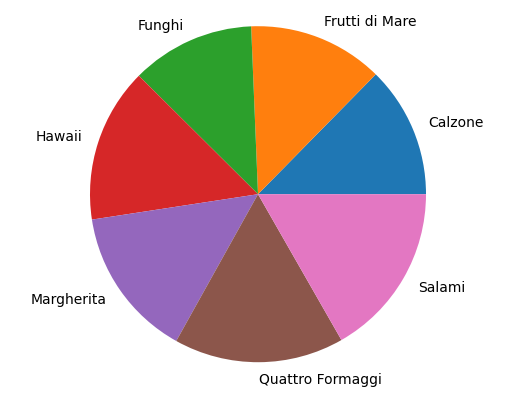

,Pizza Type,Time,Distance,Delivery Guy,Hour,Price
0,Calzone,34,34,34,34,34
1,Frutti di Mare,35,35,35,35,35
2,Funghi,32,32,32,32,32
3,Hawaii,40,40,40,40,40
4,Margherita,39,39,39,39,39
5,Quattro Formaggi,44,44,44,44,44
6,Salami,45,45,45,45,45


In [9]:

task_6_4 = pizza_order_df.groupby(["Pizza Type"]).count()
task_6_4 = task_6_4.reset_index()

task_6_4_maximum = task_6_4.max()

task_6_4_m = task_6_4[task_6_4["Time"]==task_6_4_maximum["Time"]].reset_index()
print("Task 6.4: The most popular pizza: " + task_6_4_m["Pizza Type"].max() + ", sold: " + str(task_6_4_m["Price"].max()))

# Plot
plt.pie(task_6_4["Price"], labels=task_6_4["Pizza Type"])

plt.axis('equal')
plt.show()
task_6_4

### 6.5 Who travelled the most that day?
(do not count batches of delivery as separate trips)

Task 6.5: Edward travelled the most (234 km) today


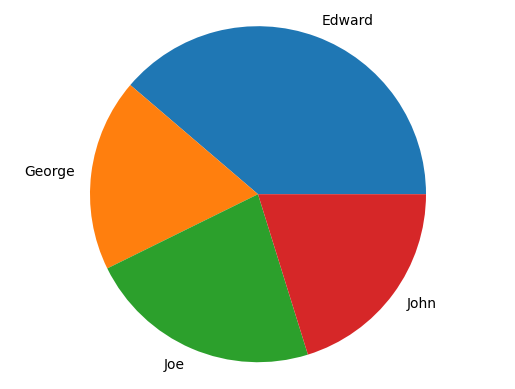

,Delivery Guy,Distance
0,Edward,234
1,George,112
2,Joe,136
3,John,122


In [10]:
task_6_5 = pizza_order_df.groupby(["Time"])
task_6_5 = task_6_5.first().reset_index()

task_6_5 = task_6_5.groupby(["Delivery Guy"]).sum("Distance").reset_index()[["Delivery Guy", "Distance"]]
max_travelled = task_6_5[task_6_5["Distance"]==task_6_5.max()["Distance"]]
print("Task 6.5: " + max_travelled["Delivery Guy"].max() +" travelled the most (" + str(max_travelled["Distance"].max()) +" km) today")

# Plot
plt.pie(task_6_5["Distance"], labels=task_6_5["Delivery Guy"])

plt.axis('equal')
plt.show()
task_6_5




### 6.6 Prices go up so fast that even the owner cannot follow. 
Can you make it so that prices are read from another file? So by changing the price in that file you can recalculate 6.2 and also calculate hourly revenues?  
Which hour produces the most income?

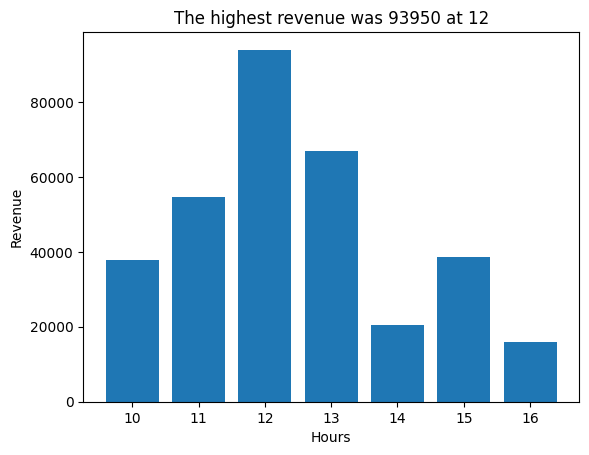

,Hour,Distance,Price,Price from File
0,10,169,37700,37700
1,11,324,54600,54600
2,12,634,93950,93950
3,13,377,66950,66950
4,14,92,20450,20450
5,15,206,38500,38500
6,16,90,16050,16050


In [11]:
price_df = pd.read_csv("pizzaprices.txt")

pizza_order_w_price_df = pd.merge(pizza_order_df, price_df, on='Pizza Type', how="left", indicator=True)
pizza_order_w_price_df = pizza_order_w_price_df.groupby("Hour").sum('Price from File').reset_index()

max_hourly_revenue = pizza_order_w_price_df[pizza_order_w_price_df["Price from File"] == pizza_order_w_price_df.max()["Price from File"]]


# Plot
plt.bar(pizza_order_w_price_df["Hour"], pizza_order_w_price_df["Price from File"])
 
plt.xlabel("Hours")
plt.ylabel("Revenue")
title_6_6 = "The highest revenue was " + str(max_hourly_revenue["Price from File"].sum()) + " at " + max_hourly_revenue["Hour"].max()
plt.title(title_6_6)
plt.show()
pizza_order_w_price_df


## Lotka-Voltera
Credit: https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

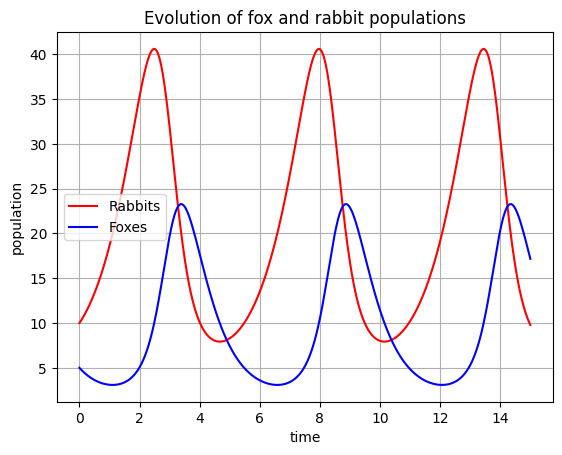

In [2]:
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] , -c*X[1] + d*b*X[0]*X[1] ])


X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])
all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2)) # => True


def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return np.array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

A_f0 = d2X_dt2(X_f0)


A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])
# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = np.linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*np.pi/abs(lambda1)                # >>> 5.130199


t = np.linspace(0, 15,  1000)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'


rabbits, foxes = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, foxes  , 'b-', label='Foxes')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of fox and rabbit populations')
p.show()